In [18]:
import pandas as pd
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

### File Reading:

In [19]:
df=Reader(sep=",").train_test_split(['/home/pavankumar/pavan/Datasets/Kaggle_Titanic/train.csv',
'/home/pavankumar/pavan/Datasets/Kaggle_Titanic/test.csv'],'Survived')


reading csv : train.csv ...
cleaning data ...
CPU time: 0.07784628868103027 seconds

reading csv : test.csv ...
cleaning data ...
CPU time: 0.0785212516784668 seconds

> Number of common features : 11

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 5
> Number of numerical features: 6
> Number of training samples : 891
> Number of test samples : 418

> Top sparse features (% missing values on train set):
Cabin       77.1
Age         19.9
Embarked     0.2
dtype: float64

> Task : classification
0.0    549
1.0    342
Name: Survived, dtype: int64

encoding target ...


In [6]:
print(df['train'].shape)
df['train'].head(3)

(891, 11)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0.0,1.0,3.0,male,1.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2.0,1.0,female,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0.0,3.0,3.0,female,0.0,STON/O2. 3101282


In [7]:
df=Drift_thresholder().fit_transform(df)## High Drift means high variation of that varible in train and test
# low drift means low variation


computing drifts ...
CPU time: 1.9738175868988037 seconds

> Top 10 drifts

('PassengerId', 1.0)
('Name', 0.989602372021563)
('Ticket', 0.650622911203723)
('Cabin', 0.18825911765677272)
('SibSp', 0.036160069507811254)
('Fare', 0.03294832261055447)
('Pclass', 0.026867594514302207)
('Age', 0.01658251412781464)
('Sex', 0.01122793918934395)
('Parch', 0.010833474163475021)

> Deleted variables : ['Name', 'PassengerId', 'Ticket']
> Drift coefficients dumped into directory : save


### Defining Space of Estimators and their Parameters:

In [8]:
space = {
    
        'est__strategy':{"search":"choice",
                                  "space":["LightGBM"]},    
        'est__n_estimators':{"search":"choice",
                                  "space":[150]},    
        'est__colsample_bytree':{"search":"uniform",
                                  "space":[0.8,0.95]},
        'est__subsample':{"search":"uniform",
                                  "space":[0.8,0.95]},
        'est__max_depth':{"search":"choice",
                                  "space":[5,6,7,8,9]},
        'est__learning_rate':{"search":"choice",
                                  "space":[0.07]} 
    
        }


### Taking out Best ESTIMATORS and corresponding Parameters:

In [9]:
best=Optimiser(scoring="accuracy",n_folds=15).optimise(space,df,40)

/home/pavankumar/miniconda3/lib/python3.6/site-packages/mlbox/optimisation/optimiser.py:77: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")



##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8610788440440915, 'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.9049933433421465, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'binary', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample_for_bin': 50000, 'subsample_freq': 1}



/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8279797389440872
VARIANCE : 0.03383465125226071 (fold 1 = 0.8166666666666667, fold 2 = 0.8833333333333333, fold 3 = 0.8333333333333334, fold 4 = 0.8166666666666667, fold 5 = 0.8333333333333334, fold 6 = 0.8666666666666667, fold 7 = 0.8333333333333334, fold 8 = 0.8666666666666667, fold 9 = 0.85, fold 10 = 0.847457627118644, fold 11 = 0.7966101694915254, fold 12 = 0.8135593220338984, fold 13 = 0.8275862068965517, fold 14 = 0.7931034482758621, fold 15 = 0.7413793103448276)
CPU time: 1.7643446922302246 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8245293889720353, 'learning_rate': 0.07, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.8681908365298201, 'boosting_type': 'g

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8235729592830704
VARIANCE : 0.04124609267109962 (fold 1 = 0.7833333333333333, fold 2 = 0.8833333333333333, fold 3 = 0.8333333333333334, fold 4 = 0.7833333333333333, fold 5 = 0.8166666666666667, fold 6 = 0.85, fold 7 = 0.8166666666666667, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.8983050847457628, fold 11 = 0.7966101694915254, fold 12 = 0.7966101694915254, fold 13 = 0.8275862068965517, fold 14 = 0.7758620689655172, fold 15 = 0.7586206896551724)
CPU time: 2.1116764545440674 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8968139311496981, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8628208440743974, 'boosting_type': 'gbdt', 'max_bi

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.82805571790376
VARIANCE : 0.03336141432958203 (fold 1 = 0.8, fold 2 = 0.8666666666666667, fold 3 = 0.85, fold 4 = 0.8333333333333334, fold 5 = 0.8166666666666667, fold 6 = 0.85, fold 7 = 0.8166666666666667, fold 8 = 0.8833333333333333, fold 9 = 0.8333333333333334, fold 10 = 0.8813559322033898, fold 11 = 0.7966101694915254, fold 12 = 0.8135593220338984, fold 13 = 0.8275862068965517, fold 14 = 0.7931034482758621, fold 15 = 0.7586206896551724)
CPU time: 1.5496995449066162 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8539862278027186, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8271696910314674, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_chi

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8313890512370933
VARIANCE : 0.03418431021445672 (fold 1 = 0.8333333333333334, fold 2 = 0.8666666666666667, fold 3 = 0.85, fold 4 = 0.8333333333333334, fold 5 = 0.8166666666666667, fold 6 = 0.85, fold 7 = 0.8333333333333334, fold 8 = 0.8666666666666667, fold 9 = 0.85, fold 10 = 0.8813559322033898, fold 11 = 0.7966101694915254, fold 12 = 0.8135593220338984, fold 13 = 0.8448275862068966, fold 14 = 0.7931034482758621, fold 15 = 0.7413793103448276)
CPU time: 2.0706164836883545 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8471222395534863, 'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8668238139953179, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8246269238262226
VARIANCE : 0.03813560710390705 (fold 1 = 0.8166666666666667, fold 2 = 0.9, fold 3 = 0.8333333333333334, fold 4 = 0.7833333333333333, fold 5 = 0.8333333333333334, fold 6 = 0.8666666666666667, fold 7 = 0.8, fold 8 = 0.8666666666666667, fold 9 = 0.85, fold 10 = 0.864406779661017, fold 11 = 0.7966101694915254, fold 12 = 0.8135593220338984, fold 13 = 0.8103448275862069, fold 14 = 0.7758620689655172, fold 15 = 0.7586206896551724)
CPU time: 1.36220121383667 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8502819672428092, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.9243690172445386, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_child

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8290908500551984
VARIANCE : 0.037960751635832506 (fold 1 = 0.8166666666666667, fold 2 = 0.8833333333333333, fold 3 = 0.85, fold 4 = 0.8, fold 5 = 0.8333333333333334, fold 6 = 0.8666666666666667, fold 7 = 0.85, fold 8 = 0.8833333333333333, fold 9 = 0.8333333333333334, fold 10 = 0.847457627118644, fold 11 = 0.8135593220338984, fold 12 = 0.7966101694915254, fold 13 = 0.8448275862068966, fold 14 = 0.7758620689655172, fold 15 = 0.7413793103448276)
CPU time: 1.4830474853515625 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8082477471774702, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.9302474158276931, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_c

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.825757516721865
VARIANCE : 0.03768478274198399 (fold 1 = 0.8166666666666667, fold 2 = 0.8833333333333333, fold 3 = 0.85, fold 4 = 0.8, fold 5 = 0.8, fold 6 = 0.85, fold 7 = 0.8333333333333334, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.847457627118644, fold 11 = 0.8135593220338984, fold 12 = 0.7966101694915254, fold 13 = 0.8448275862068966, fold 14 = 0.7758620689655172, fold 15 = 0.7413793103448276)
CPU time: 1.6463596820831299 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8880460100695836, 'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8590423819796993, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_child_samples': 10, 'min_child_w

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8269257744009351
VARIANCE : 0.03672606949272337 (fold 1 = 0.8, fold 2 = 0.8833333333333333, fold 3 = 0.85, fold 4 = 0.8166666666666667, fold 5 = 0.8, fold 6 = 0.85, fold 7 = 0.8166666666666667, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.8813559322033898, fold 11 = 0.7966101694915254, fold 12 = 0.7966101694915254, fold 13 = 0.8275862068965517, fold 14 = 0.7931034482758621, fold 15 = 0.7586206896551724)
CPU time: 1.8832592964172363 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8617769721298657, 'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8978193344202113, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_child_samples': 10, 'min_child

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.827941424767842
VARIANCE : 0.03673233840383501 (fold 1 = 0.8333333333333334, fold 2 = 0.8666666666666667, fold 3 = 0.85, fold 4 = 0.8, fold 5 = 0.85, fold 6 = 0.8666666666666667, fold 7 = 0.8166666666666667, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.847457627118644, fold 11 = 0.7966101694915254, fold 12 = 0.8135593220338984, fold 13 = 0.8275862068965517, fold 14 = 0.7758620689655172, fold 15 = 0.7413793103448276)
CPU time: 1.4632446765899658 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.9149347513035438, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.845324294278706, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_child_samples': 10

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8314273654133385
VARIANCE : 0.033743350960415266 (fold 1 = 0.7833333333333333, fold 2 = 0.8666666666666667, fold 3 = 0.85, fold 4 = 0.8333333333333334, fold 5 = 0.8333333333333334, fold 6 = 0.85, fold 7 = 0.8333333333333334, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.8813559322033898, fold 11 = 0.7966101694915254, fold 12 = 0.8135593220338984, fold 13 = 0.8275862068965517, fold 14 = 0.8103448275862069, fold 15 = 0.7586206896551724)
CPU time: 1.7513010501861572 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.9024533701245057, 'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8542991627528732, 'boosting_type': 'gbdt', 'max_bin': 255, 'min

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8314085330216248
VARIANCE : 0.032754887926183175 (fold 1 = 0.8166666666666667, fold 2 = 0.8666666666666667, fold 3 = 0.85, fold 4 = 0.8166666666666667, fold 5 = 0.8166666666666667, fold 6 = 0.8666666666666667, fold 7 = 0.8333333333333334, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.864406779661017, fold 11 = 0.7966101694915254, fold 12 = 0.8135593220338984, fold 13 = 0.8448275862068966, fold 14 = 0.7931034482758621, fold 15 = 0.7586206896551724)
CPU time: 1.9949324131011963 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8801372393966829, 'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.9345614339334145, 'boosting_type': 'gbdt', 'max_bi

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8280758490811092
VARIANCE : 0.03654096497693858 (fold 1 = 0.8166666666666667, fold 2 = 0.8833333333333333, fold 3 = 0.8333333333333334, fold 4 = 0.8, fold 5 = 0.8166666666666667, fold 6 = 0.85, fold 7 = 0.85, fold 8 = 0.8833333333333333, fold 9 = 0.8333333333333334, fold 10 = 0.864406779661017, fold 11 = 0.7796610169491526, fold 12 = 0.7966101694915254, fold 13 = 0.8620689655172413, fold 14 = 0.7931034482758621, fold 15 = 0.7586206896551724)
CPU time: 1.7118682861328125 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8137359233732925, 'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8872750181421275, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_ch

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8235164621079291
VARIANCE : 0.038256006345177854 (fold 1 = 0.8166666666666667, fold 2 = 0.8833333333333333, fold 3 = 0.8333333333333334, fold 4 = 0.7833333333333333, fold 5 = 0.8333333333333334, fold 6 = 0.85, fold 7 = 0.8166666666666667, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.847457627118644, fold 11 = 0.7966101694915254, fold 12 = 0.7966101694915254, fold 13 = 0.8448275862068966, fold 14 = 0.7758620689655172, fold 15 = 0.7413793103448276)
CPU time: 1.688136100769043 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8717236859403231, 'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.9065619742447114, 'boosting_type': 'gbdt', 'max_bin

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8291096824469121
VARIANCE : 0.03526631964433472 (fold 1 = 0.8166666666666667, fold 2 = 0.8666666666666667, fold 3 = 0.85, fold 4 = 0.8166666666666667, fold 5 = 0.8166666666666667, fold 6 = 0.8666666666666667, fold 7 = 0.8333333333333334, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.864406779661017, fold 11 = 0.7966101694915254, fold 12 = 0.8135593220338984, fold 13 = 0.8275862068965517, fold 14 = 0.7931034482758621, fold 15 = 0.7413793103448276)
CPU time: 1.815943956375122 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.9443275929998817, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.9219596652067051, 'boosting_type': 'gbdt', 'max_bin'

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8335917916747841
VARIANCE : 0.038900384977705024 (fold 1 = 0.8333333333333334, fold 2 = 0.8833333333333333, fold 3 = 0.85, fold 4 = 0.8, fold 5 = 0.8166666666666667, fold 6 = 0.8833333333333333, fold 7 = 0.8333333333333334, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.864406779661017, fold 11 = 0.8305084745762712, fold 12 = 0.8135593220338984, fold 13 = 0.8448275862068966, fold 14 = 0.7758620689655172, fold 15 = 0.7413793103448276)
CPU time: 1.5752320289611816 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.9332905057049079, 'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 150, 'subsample': 0.8278997628867879, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_c

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.831389700629911
VARIANCE : 0.035529531012537544 (fold 1 = 0.8, fold 2 = 0.9, fold 3 = 0.85, fold 4 = 0.8166666666666667, fold 5 = 0.8333333333333334, fold 6 = 0.8666666666666667, fold 7 = 0.8333333333333334, fold 8 = 0.8666666666666667, fold 9 = 0.85, fold 10 = 0.864406779661017, fold 11 = 0.7796610169491526, fold 12 = 0.8135593220338984, fold 13 = 0.8275862068965517, fold 14 = 0.8103448275862069, fold 15 = 0.7586206896551724)
CPU time: 1.5520479679107666 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.9155898514631129, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.9203472259782685, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_child_samples': 1

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.832480680563673
VARIANCE : 0.03340502796579076 (fold 1 = 0.8333333333333334, fold 2 = 0.8666666666666667, fold 3 = 0.85, fold 4 = 0.8166666666666667, fold 5 = 0.8166666666666667, fold 6 = 0.85, fold 7 = 0.85, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.864406779661017, fold 11 = 0.8305084745762712, fold 12 = 0.8135593220338984, fold 13 = 0.8275862068965517, fold 14 = 0.7931034482758621, fold 15 = 0.7413793103448276)
CPU time: 1.4801380634307861 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.9016663837926794, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8838648949028696, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_child_samples': 

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8314091824144426
VARIANCE : 0.0360355493865853 (fold 1 = 0.8, fold 2 = 0.8833333333333333, fold 3 = 0.85, fold 4 = 0.8166666666666667, fold 5 = 0.8166666666666667, fold 6 = 0.8666666666666667, fold 7 = 0.85, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.847457627118644, fold 11 = 0.7966101694915254, fold 12 = 0.7966101694915254, fold 13 = 0.8620689655172413, fold 14 = 0.7931034482758621, fold 15 = 0.7586206896551724)
CPU time: 1.4390246868133545 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8975302356956034, 'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8410272902736059, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_child_samples': 1

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8336502370283785
VARIANCE : 0.03337302852592665 (fold 1 = 0.8166666666666667, fold 2 = 0.8666666666666667, fold 3 = 0.85, fold 4 = 0.8333333333333334, fold 5 = 0.8333333333333334, fold 6 = 0.8666666666666667, fold 7 = 0.85, fold 8 = 0.8666666666666667, fold 9 = 0.85, fold 10 = 0.864406779661017, fold 11 = 0.7796610169491526, fold 12 = 0.8135593220338984, fold 13 = 0.8620689655172413, fold 14 = 0.7931034482758621, fold 15 = 0.7586206896551724)
CPU time: 1.6254136562347412 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.9340710484751206, 'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 150, 'subsample': 0.9323721037378774, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_c

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8324813299564907
VARIANCE : 0.04059798211656088 (fold 1 = 0.8166666666666667, fold 2 = 0.8833333333333333, fold 3 = 0.85, fold 4 = 0.8, fold 5 = 0.85, fold 6 = 0.8666666666666667, fold 7 = 0.8666666666666667, fold 8 = 0.8833333333333333, fold 9 = 0.8166666666666667, fold 10 = 0.864406779661017, fold 11 = 0.8135593220338984, fold 12 = 0.7966101694915254, fold 13 = 0.8620689655172413, fold 14 = 0.7758620689655172, fold 15 = 0.7413793103448276)
CPU time: 1.4846909046173096 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.9466300279651212, 'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8045723756737283, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_ch

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8247223845704267
VARIANCE : 0.040143750973598714 (fold 1 = 0.7833333333333333, fold 2 = 0.8833333333333333, fold 3 = 0.85, fold 4 = 0.8, fold 5 = 0.8166666666666667, fold 6 = 0.85, fold 7 = 0.7833333333333333, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.8813559322033898, fold 11 = 0.7966101694915254, fold 12 = 0.8135593220338984, fold 13 = 0.8448275862068966, fold 14 = 0.7758620689655172, fold 15 = 0.7586206896551724)
CPU time: 1.4609253406524658 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.945472571101082, 'learning_rate': 0.07, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.8111204846611018, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_child_samples':

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8290908500551984
VARIANCE : 0.03472470092078835 (fold 1 = 0.8333333333333334, fold 2 = 0.8833333333333333, fold 3 = 0.85, fold 4 = 0.8, fold 5 = 0.85, fold 6 = 0.85, fold 7 = 0.8166666666666667, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.847457627118644, fold 11 = 0.7966101694915254, fold 12 = 0.8135593220338984, fold 13 = 0.8275862068965517, fold 14 = 0.7758620689655172, fold 15 = 0.7586206896551724)
CPU time: 1.4588792324066162 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.9237132123555474, 'learning_rate': 0.07, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.9455303077623934, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_child_samples': 10, 'min_child

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8257763491135788
VARIANCE : 0.03320928924152142 (fold 1 = 0.8, fold 2 = 0.8666666666666667, fold 3 = 0.85, fold 4 = 0.8, fold 5 = 0.8333333333333334, fold 6 = 0.8666666666666667, fold 7 = 0.8166666666666667, fold 8 = 0.8833333333333333, fold 9 = 0.8333333333333334, fold 10 = 0.847457627118644, fold 11 = 0.8135593220338984, fold 12 = 0.8135593220338984, fold 13 = 0.8275862068965517, fold 14 = 0.7758620689655172, fold 15 = 0.7586206896551724)
CPU time: 1.5535717010498047 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8377024509600688, 'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8393772359318964, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_chi

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8269634391843625
VARIANCE : 0.039432747073506476 (fold 1 = 0.8333333333333334, fold 2 = 0.8833333333333333, fold 3 = 0.8666666666666667, fold 4 = 0.7833333333333333, fold 5 = 0.7833333333333333, fold 6 = 0.8666666666666667, fold 7 = 0.7833333333333333, fold 8 = 0.8666666666666667, fold 9 = 0.85, fold 10 = 0.8813559322033898, fold 11 = 0.8135593220338984, fold 12 = 0.8135593220338984, fold 13 = 0.8275862068965517, fold 14 = 0.7931034482758621, fold 15 = 0.7586206896551724)
CPU time: 1.4153828620910645 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.9479478427510403, 'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 150, 'subsample': 0.8210490885903899, 'boosting_type': 

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8313130722774206
VARIANCE : 0.03552215690111511 (fold 1 = 0.8166666666666667, fold 2 = 0.8666666666666667, fold 3 = 0.85, fold 4 = 0.8166666666666667, fold 5 = 0.85, fold 6 = 0.8666666666666667, fold 7 = 0.8666666666666667, fold 8 = 0.8666666666666667, fold 9 = 0.85, fold 10 = 0.864406779661017, fold 11 = 0.7796610169491526, fold 12 = 0.8135593220338984, fold 13 = 0.8275862068965517, fold 14 = 0.7758620689655172, fold 15 = 0.7586206896551724)
CPU time: 1.433889389038086 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.931436966696381, 'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 150, 'subsample': 0.9497975286607893, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_chi

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8335924410676019
VARIANCE : 0.0347467853585125 (fold 1 = 0.8166666666666667, fold 2 = 0.8666666666666667, fold 3 = 0.8666666666666667, fold 4 = 0.8333333333333334, fold 5 = 0.8333333333333334, fold 6 = 0.8666666666666667, fold 7 = 0.85, fold 8 = 0.8833333333333333, fold 9 = 0.8333333333333334, fold 10 = 0.864406779661017, fold 11 = 0.7966101694915254, fold 12 = 0.8135593220338984, fold 13 = 0.8448275862068966, fold 14 = 0.7758620689655172, fold 15 = 0.7586206896551724)
CPU time: 1.5498104095458984 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.9142680935777854, 'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 150, 'subsample': 0.8476876869196189, 'boosting_type': 'gb

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8292622897590752
VARIANCE : 0.036121851648485324 (fold 1 = 0.8, fold 2 = 0.8666666666666667, fold 3 = 0.85, fold 4 = 0.8, fold 5 = 0.8166666666666667, fold 6 = 0.85, fold 7 = 0.8166666666666667, fold 8 = 0.8666666666666667, fold 9 = 0.85, fold 10 = 0.8983050847457628, fold 11 = 0.7966101694915254, fold 12 = 0.8135593220338984, fold 13 = 0.8620689655172413, fold 14 = 0.7931034482758621, fold 15 = 0.7586206896551724)
CPU time: 1.4886491298675537 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8876848842713125, 'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 150, 'subsample': 0.9496190216072862, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_child_samples': 10, 'min_chil

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8335924410676019
VARIANCE : 0.0347467853585125 (fold 1 = 0.8166666666666667, fold 2 = 0.8666666666666667, fold 3 = 0.8666666666666667, fold 4 = 0.8333333333333334, fold 5 = 0.8333333333333334, fold 6 = 0.8666666666666667, fold 7 = 0.85, fold 8 = 0.8833333333333333, fold 9 = 0.8333333333333334, fold 10 = 0.864406779661017, fold 11 = 0.7966101694915254, fold 12 = 0.8135593220338984, fold 13 = 0.8448275862068966, fold 14 = 0.7758620689655172, fold 15 = 0.7586206896551724)
CPU time: 1.5788345336914062 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.870003197115501, 'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 150, 'subsample': 0.8774678586724984, 'boosting_type': 'gbd

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8291291642314438
VARIANCE : 0.036073957506314855 (fold 1 = 0.8166666666666667, fold 2 = 0.9, fold 3 = 0.85, fold 4 = 0.8, fold 5 = 0.8166666666666667, fold 6 = 0.8666666666666667, fold 7 = 0.8333333333333334, fold 8 = 0.8666666666666667, fold 9 = 0.85, fold 10 = 0.864406779661017, fold 11 = 0.7966101694915254, fold 12 = 0.7966101694915254, fold 13 = 0.8275862068965517, fold 14 = 0.7931034482758621, fold 15 = 0.7586206896551724)
CPU time: 1.4028222560882568 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.930655102169302, 'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 150, 'subsample': 0.8369710071333604, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_child_samples': 1

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8314273654133386
VARIANCE : 0.03090027162664772 (fold 1 = 0.8166666666666667, fold 2 = 0.8666666666666667, fold 3 = 0.85, fold 4 = 0.8166666666666667, fold 5 = 0.8166666666666667, fold 6 = 0.8666666666666667, fold 7 = 0.8333333333333334, fold 8 = 0.8666666666666667, fold 9 = 0.85, fold 10 = 0.864406779661017, fold 11 = 0.7966101694915254, fold 12 = 0.8305084745762712, fold 13 = 0.8448275862068966, fold 14 = 0.7931034482758621, fold 15 = 0.7586206896551724)
CPU time: 1.641632080078125 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8887517181442821, 'learning_rate': 0.07, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.9069815003282988, 'boosting_type': 'gbdt', 'max_bin'

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8212942398857067
VARIANCE : 0.03384326718329452 (fold 1 = 0.8, fold 2 = 0.8833333333333333, fold 3 = 0.8666666666666667, fold 4 = 0.8166666666666667, fold 5 = 0.8166666666666667, fold 6 = 0.8333333333333334, fold 7 = 0.8, fold 8 = 0.8666666666666667, fold 9 = 0.8333333333333334, fold 10 = 0.8305084745762712, fold 11 = 0.7966101694915254, fold 12 = 0.8135593220338984, fold 13 = 0.8275862068965517, fold 14 = 0.7931034482758621, fold 15 = 0.7413793103448276)
CPU time: 1.4944384098052979 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8842152303564694, 'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.811021658258744, 'boosting_type': 'gbdt', 'max_bin':

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8324813299564907
VARIANCE : 0.032699476098044 (fold 1 = 0.8, fold 2 = 0.8666666666666667, fold 3 = 0.85, fold 4 = 0.8333333333333334, fold 5 = 0.85, fold 6 = 0.85, fold 7 = 0.85, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.864406779661017, fold 11 = 0.7966101694915254, fold 12 = 0.8135593220338984, fold 13 = 0.8275862068965517, fold 14 = 0.7931034482758621, fold 15 = 0.7586206896551724)
CPU time: 1.456216812133789 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8950394210714525, 'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.87224733649186, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_s

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8347983635300993
VARIANCE : 0.03890615677325384 (fold 1 = 0.7833333333333333, fold 2 = 0.9, fold 3 = 0.85, fold 4 = 0.8333333333333334, fold 5 = 0.8166666666666667, fold 6 = 0.8833333333333333, fold 7 = 0.8, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.8813559322033898, fold 11 = 0.8305084745762712, fold 12 = 0.8135593220338984, fold 13 = 0.8275862068965517, fold 14 = 0.8103448275862069, fold 15 = 0.7586206896551724)
CPU time: 1.439570426940918 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8330503534847075, 'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8739550359202287, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_child_samples': 1

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8246847197869993
VARIANCE : 0.03681464440738183 (fold 1 = 0.7833333333333333, fold 2 = 0.8833333333333333, fold 3 = 0.85, fold 4 = 0.7833333333333333, fold 5 = 0.8333333333333334, fold 6 = 0.8666666666666667, fold 7 = 0.8166666666666667, fold 8 = 0.8666666666666667, fold 9 = 0.85, fold 10 = 0.864406779661017, fold 11 = 0.7966101694915254, fold 12 = 0.7966101694915254, fold 13 = 0.8275862068965517, fold 14 = 0.7931034482758621, fold 15 = 0.7586206896551724)
CPU time: 1.3123869895935059 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8635379527375926, 'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.892936370385052, 'boosting_type': 'gbdt', 'max_bin'

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8257958308981104
VARIANCE : 0.04038603101122857 (fold 1 = 0.8166666666666667, fold 2 = 0.9, fold 3 = 0.8333333333333334, fold 4 = 0.7833333333333333, fold 5 = 0.8333333333333334, fold 6 = 0.85, fold 7 = 0.8, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.847457627118644, fold 11 = 0.7966101694915254, fold 12 = 0.8135593220338984, fold 13 = 0.8620689655172413, fold 14 = 0.7586206896551724, fold 15 = 0.7586206896551724)
CPU time: 1.3135688304901123 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8986659674590599, 'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8700254384860249, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_child_samples': 1

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8347983635300993
VARIANCE : 0.03549121596965259 (fold 1 = 0.8, fold 2 = 0.9, fold 3 = 0.85, fold 4 = 0.8333333333333334, fold 5 = 0.8166666666666667, fold 6 = 0.8666666666666667, fold 7 = 0.8166666666666667, fold 8 = 0.8666666666666667, fold 9 = 0.85, fold 10 = 0.8813559322033898, fold 11 = 0.8305084745762712, fold 12 = 0.8135593220338984, fold 13 = 0.8448275862068966, fold 14 = 0.7931034482758621, fold 15 = 0.7586206896551724)
CPU time: 1.3565902709960938 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.9079339980847017, 'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8689496268278296, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_child_samples': 

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8314085330216249
VARIANCE : 0.037637870385925205 (fold 1 = 0.8, fold 2 = 0.9, fold 3 = 0.85, fold 4 = 0.8333333333333334, fold 5 = 0.8166666666666667, fold 6 = 0.8666666666666667, fold 7 = 0.8166666666666667, fold 8 = 0.8666666666666667, fold 9 = 0.85, fold 10 = 0.864406779661017, fold 11 = 0.7966101694915254, fold 12 = 0.8135593220338984, fold 13 = 0.8620689655172413, fold 14 = 0.7758620689655172, fold 15 = 0.7586206896551724)
CPU time: 1.4383211135864258 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8552029119571509, 'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8551690293867771, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_child_samples': 

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8279797389440874
VARIANCE : 0.037943137507464614 (fold 1 = 0.8333333333333334, fold 2 = 0.8833333333333333, fold 3 = 0.85, fold 4 = 0.8166666666666667, fold 5 = 0.8333333333333334, fold 6 = 0.8833333333333333, fold 7 = 0.7833333333333333, fold 8 = 0.8666666666666667, fold 9 = 0.85, fold 10 = 0.864406779661017, fold 11 = 0.7966101694915254, fold 12 = 0.7966101694915254, fold 13 = 0.8275862068965517, fold 14 = 0.7758620689655172, fold 15 = 0.7586206896551724)
CPU time: 1.3122305870056152 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8769585275417829, 'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8650548534427639, 'boosting_type': 'gbdt', 'max_bi

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.830296772517696
VARIANCE : 0.03874917743837579 (fold 1 = 0.7833333333333333, fold 2 = 0.8833333333333333, fold 3 = 0.85, fold 4 = 0.8166666666666667, fold 5 = 0.8333333333333334, fold 6 = 0.8666666666666667, fold 7 = 0.8, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.8813559322033898, fold 11 = 0.8135593220338984, fold 12 = 0.8135593220338984, fold 13 = 0.8448275862068966, fold 14 = 0.7758620689655172, fold 15 = 0.7586206896551724)
CPU time: 1.4210057258605957 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8924204567995891, 'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8983530966962835, 'boosting_type': 'gbdt', 'max_bin': 255, 'min_ch

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of


MEAN SCORE : accuracy = 0.8223475550360413
VARIANCE : 0.04083599748988458 (fold 1 = 0.8166666666666667, fold 2 = 0.9, fold 3 = 0.8166666666666667, fold 4 = 0.8166666666666667, fold 5 = 0.8, fold 6 = 0.8666666666666667, fold 7 = 0.8, fold 8 = 0.8833333333333333, fold 9 = 0.85, fold 10 = 0.8305084745762712, fold 11 = 0.8305084745762712, fold 12 = 0.7966101694915254, fold 13 = 0.8275862068965517, fold 14 = 0.7586206896551724, fold 15 = 0.7413793103448276)
CPU time: 1.3905854225158691 seconds



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ BEST HYPER-PARAMETERS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

{'est__colsample_bytree': 0.8950394210714525, 'est__learning_rate': 0.07, 'est__max_dep

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [10]:
best

{'est__colsample_bytree': 0.8950394210714525,
 'est__learning_rate': 0.07,
 'est__max_depth': 5,
 'est__n_estimators': 150,
 'est__strategy': 'LightGBM',
 'est__subsample': 0.87224733649186}

### Applying best params and getting final results:


fitting the pipeline ...
CPU time: 0.11516904830932617 seconds


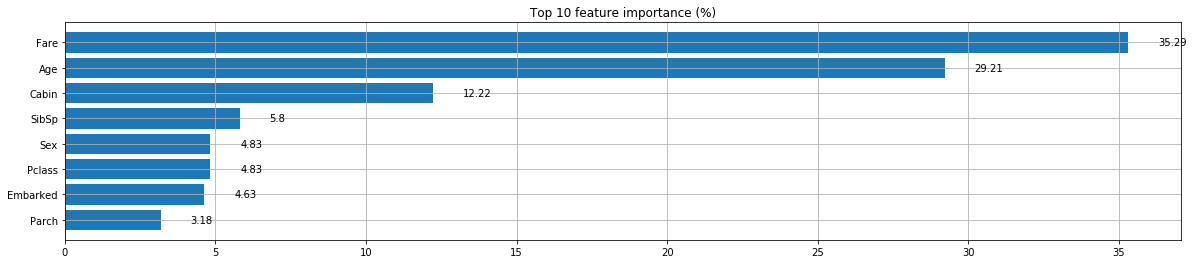


> Feature importances dumped into directory : save

predicting ...
CPU time: 0.03374338150024414 seconds

> Overview on predictions : 

        0.0       1.0  Survived_predicted
0  0.914147  0.085853                   0
1  0.744338  0.255662                   0
2  0.904403  0.095597                   0
3  0.836379  0.163621                   0
4  0.661344  0.338656                   0
5  0.688820  0.311180                   0
6  0.328125  0.671875                   1
7  0.866036  0.133964                   0
8  0.192994  0.807006                   1
9  0.964804  0.035196                   0

dumping predictions into directory : save ...


/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [11]:
Predictor().fit_predict(best,df)

### Loading Saved csv file of Predictions:

In [12]:
preds = pd.read_csv('/home/pavankumar/pavan/my_python/save/Survived_predictions.csv')

In [20]:
preds.columns

Index(['Unnamed: 0', '0.0', '1.0', 'Survived_predicted'], dtype='object')

## Final prediction  of Test Data:

In [22]:
preds.Survived_predicted.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    1
9    0
Name: Survived_predicted, dtype: int64